### **2장. 개인 연습**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

uriage = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Data/uriage.csv')
kokyaku_daicho = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Data/kokyaku_daicho.xlsx')

In [ ]:
uriage['purchase_date'] = pd.to_datetime(uriage['purchase_date'])
uriage['purchase_month'] = uriage['purchase_date'].dt.strftime("%Y%m")

In [ ]:
res1 = uriage.groupby('item_name').sum().sort_values(by='item_name')
res1

,item_price
item_name,
상 품 n,1400.0
상품 E,500.0
상품 M,1300.0
상품 P,1600.0
상품 S,1900.0
...,...
상품s,3800.0
상품t,2000.0
상품v,2200.0


In [ ]:
modify_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Data/dump_data.csv')

In [ ]:
res1 = modify_data.groupby('item_name').sum()[['item_price']].sort_values(by='item_name')
res1

,item_price
item_name,
상품A,13900.0
상품B,22600.0
상품C,39900.0
상품D,50000.0
상품E,52500.0
상품F,75600.0
상품G,77000.0
상품H,87200.0
상품I,102600.0


In [ ]:
res2 = modify_data.groupby(['item_name','purchase_month']).sum()[['item_price']].sort_values(by='item_name')
res2

item_price
item_name purchase_month            
상품A       201901              1800.0
          201902              1900.0
          201903              1700.0
          201904              1700.0
          201905              2400.0
...                              ...
상품Y       201903             40000.0
          201904             50000.0
          201905             50000.0
          201906             32500.0
상품Z       201902              2600.0

[176 rows x 1 columns]

In [ ]:
res3 = modify_data.pivot_table(index='purchase_month',columns='item_name',values='item_price',aggfunc='sum')
res3

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,상품K,상품L,상품M,상품N,상품O,상품P,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,,,,,,
201901,1800.0,2600.0,5700.0,6800.0,9000.0,9000.0,7700.0,12800.0,16200.0,17000.0,22000.0,22800.0,24700.0,22400.0,36000.0,25600.0,28900.0,37800.0,38000.0,34000.0,14700.0,48400.0,29900.0,33600.0,25000.0,NaN
201902,1900.0,2800.0,7800.0,8400.0,8000.0,8400.0,9800.0,13600.0,10800.0,14000.0,17600.0,13200.0,19500.0,28000.0,28500.0,30400.0,37400.0,39600.0,41800.0,46000.0,39900.0,48400.0,55200.0,38400.0,27500.0,2600.0
201903,1700.0,4200.0,6000.0,6800.0,4500.0,16200.0,9800.0,14400.0,10800.0,16000.0,15400.0,24000.0,28600.0,18200.0,16500.0,33600.0,39100.0,28800.0,38000.0,24000.0,48300.0,39600.0,36800.0,50400.0,40000.0,NaN
201904,1700.0,3800.0,7200.0,8000.0,9000.0,10200.0,9800.0,8800.0,16200.0,13000.0,15400.0,18000.0,14300.0,28000.0,22500.0,24000.0,34000.0,36000.0,30400.0,32000.0,23100.0,33000.0,32200.0,38400.0,50000.0,NaN
201905,2400.0,2800.0,4800.0,5600.0,9500.0,10800.0,16100.0,12000.0,14400.0,11000.0,19800.0,15600.0,23400.0,26600.0,27000.0,32000.0,22100.0,39600.0,34200.0,32000.0,33600.0,19800.0,48300.0,38400.0,50000.0,NaN
201906,2400.0,2400.0,3300.0,7600.0,6500.0,10800.0,10500.0,10400.0,17100.0,22000.0,16500.0,18000.0,22100.0,22400.0,22500.0,28800.0,25500.0,28800.0,39900.0,24000.0,37800.0,44000.0,39100.0,36000.0,32500.0,NaN
201907,2000.0,4000.0,5100.0,6800.0,6000.0,10200.0,13300.0,15200.0,17100.0,23000.0,13200.0,20400.0,14300.0,21000.0,33000.0,41600.0,25500.0,34200.0,43700.0,42000.0,27300.0,61600.0,36800.0,43200.0,30000.0,NaN


In [ ]:
uriage.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬,201907
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품a,NaN,김강현,201904


In [ ]:
uriage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   purchase_date   2999 non-null   datetime64[ns]
 1   item_name       2999 non-null   object        
 2   item_price      2612 non-null   float64       
 3   customer_name   2999 non-null   object        
 4   purchase_month  2999 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 117.3+ KB


In [ ]:
temp = uriage['item_name'].str
type(temp)

pandas.core.strings.StringMethods

In [ ]:
uriage['item_name'] = uriage['item_name'].str.upper()
uriage['item_name'] = uriage['item_name'].str.replace(" ","")
uriage.sort_values(by=['item_name'],ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [ ]:
print(len(pd.unique(uriage['item_name'])))

26


In [ ]:
kokyaku_daicho['등록일'].astype("str").str.isdigit().sum()

22

In [ ]:
kokyaku_daicho['등록일'].str.isdigit().sum()

0.0

In [ ]:
kokyaku_daicho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객이름    200 non-null    object
 1   지역      200 non-null    object
 2   등록일     200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
temp1 = kokyaku_daicho['등록일'].astype("str")
temp2 = kokyaku_daicho['등록일'].str
temp3 = kokyaku_daicho['등록일'].astype("str").str

print(type(temp1))
print(type(temp2))
print(type(temp3))

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.StringMethods'>
<class 'pandas.core.strings.StringMethods'>


In [ ]:
kokyaku_daicho.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [ ]:
temp1.head()

0    2018-01-04 00:00:00
1                  42782
2    2018-01-07 00:00:00
3                  42872
4                  43127
Name: 등록일, dtype: object

In [ ]:
temp2

In [ ]:
temp2==temp3

False

### **1장. 복습하기**

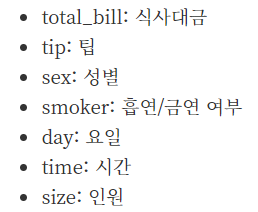

In [ ]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

#### 1) 각 붓꽃 종별로 가장 큰 값과 가장 작은 값의 비율 구하기

##### Hint > 그룹연산 메서드를 직접 만든 후 agg 메서드에 적용

In [ ]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

In [ ]:
iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


#### 2) 각 붓꽃 종별로 가장 꽃잎 길이(petal length)가 큰 3개의 데이터를 뽑아내기

##### Hint > apply 메서드로 데이터프레임 만들기

In [ ]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3]

In [ ]:
iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  ...  petal_width     species
species                                    ...                         
setosa     24            4.8          3.4  ...          0.2      setosa
           44            5.1          3.8  ...          0.4      setosa
           23            5.1          3.3  ...          0.5      setosa
versicolor 83            6.0          2.7  ...          1.6  versicolor
           77            6.7          3.0  ...          1.7  versicolor
           72            6.3          2.5  ...          1.5  versicolor
virginica  118           7.7          2.6  ...          2.3   virginica
           117           7.7          3.8  ...          2.2   virginica
           122           7.7          2.8  ...          2.0   virginica

[9 rows x 5 columns]

#### 3)  붓꽃 꽃잎길이가 해당 종 내에서 대/중/소 어느 것에 해당되는지에 대한 데이터프레임 만들기

##### Hint> transform 메서드로 그룹별 계산을 통해 데이터프레임 자체를 변화시키기

In [ ]:
def q3cut(s):
    return pd.qcut(s, 3, labels=["소", "중", "대"]).astype(str)

In [ ]:
iris["petal_length_class"] = iris.groupby(iris.species).petal_length.transform(q3cut)
iris[["petal_length", "petal_length_class"]].tail(10)

,petal_length,petal_length_class
140,5.6,중
141,5.1,소
142,5.1,소
143,5.9,대
144,5.7,중
145,5.2,소
146,5.0,소
147,5.2,소
148,5.4,중
149,5.1,소


#### 4) 아래 사진과 같은 결과물 만들기 -  식사대금와 팁의 비율

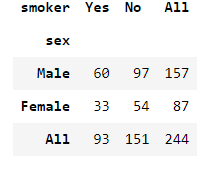

##### Hint> 새로운 변수를 만든 후 pivot_table 이용

In [ ]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [ ]:
tips.pivot_table("tip_pct", "sex", "smoker", aggfunc="count", margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


#### 5) 아래 사진과 같은 결과물 만들기

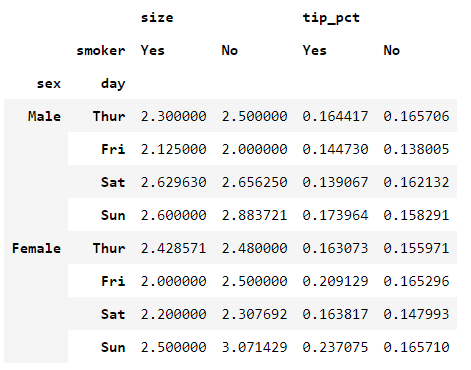

##### Hint> pivot_table 이용

In [ ]:
tips.pivot_table(['tip_pct', 'size'], ['sex', 'day'], 'smoker')

size             tip_pct          
smoker            Yes        No       Yes        No
sex    day                                         
Male   Thur  2.300000  2.500000  0.164417  0.165706
       Fri   2.125000  2.000000  0.144730  0.138005
       Sat   2.629630  2.656250  0.139067  0.162132
       Sun   2.600000  2.883721  0.173964  0.158291
Female Thur  2.428571  2.480000  0.163073  0.155971
       Fri   2.000000  2.500000  0.209129  0.165296
       Sat   2.200000  2.307692  0.163817  0.147993
       Sun   2.500000  3.071429  0.237075  0.165710